### PART A


In [80]:
#Importing all the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#Loading the dataset
df=pd.read_csv('CE802_P2_Data.csv')
#!pip install mlxtend  


# Exploratory Data Analysis

In [82]:
#Remove duplicate observations
df.drop_duplicates()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,-13.7350,5.9854,14.24730,1.4892,9959.04,-3199.350,6.8670,-4850.820,NaN,False
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,-5.1710,4.6222,14.99820,3.1206,10107.44,-3064.950,9.4710,378.780,NaN,True
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,-38.6500,4.4096,17.79000,1.9818,10971.04,-3638.850,2.0373,-5215.480,NaN,False
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,-8.6390,8.5080,12.98424,11.5620,9681.10,724.950,2.0220,-4378.420,NaN,False
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,-14.7300,5.5188,13.57260,2.5440,10965.64,-2607.150,4.3140,-1919.220,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-28685.380,0.73,-4.095060,-15.54300,1654.77,1,4.09930,16381.38,0,-9861.820,...,-19.3800,6.4440,13.15350,3.2538,10170.64,-3932.850,1.4196,-5053.546,-10.75,False
996,-28668.770,1.73,-4.050914,-9.18600,1457.85,0,4.36770,16036.38,0,-9418.336,...,-31.7600,4.7966,14.72040,13.4190,9607.28,-3421.860,1.6728,-4964.700,-10.35,False
997,-28667.610,1.73,-4.887000,-11.41200,1515.96,0,5.01500,16097.92,1,-10209.620,...,-19.6400,6.4060,13.55100,2.1246,10907.64,-2875.950,2.6988,-4965.880,-11.01,True
998,-28750.050,0.73,-5.490800,-5.07480,2249.25,0,3.88900,16120.46,1,-9358.160,...,-6.4210,4.5810,16.77000,4.0221,9815.54,-3513.039,6.1860,-4261.020,NaN,False


In [83]:
#To view missing values in dataset
df.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21      500
Class      0
dtype: int64

In [84]:
#Encoding 
df["Class"]= np.where(df["Class"]==True,1,0)

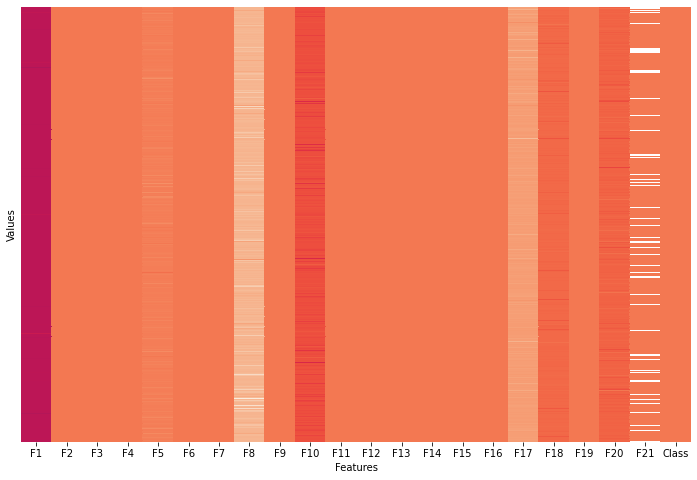

In [89]:
#Heatmap to visualize the missing value in the features
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df,cbar=False,yticklabels=False)
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

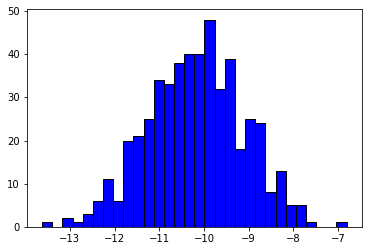

In [93]:
#To view the distribution in F21
plt.hist(df['F21'], color='blue', edgecolor='black', bins=30)
plt.show()

In [95]:
# Mean Imputation
df_mean = df.copy()
mean_imputer = SimpleImputer(strategy='mean')
df_mean['F21'] = mean_imputer.fit_transform(df_mean['F21'].values.reshape(-1,1))
df=df_mean.copy()

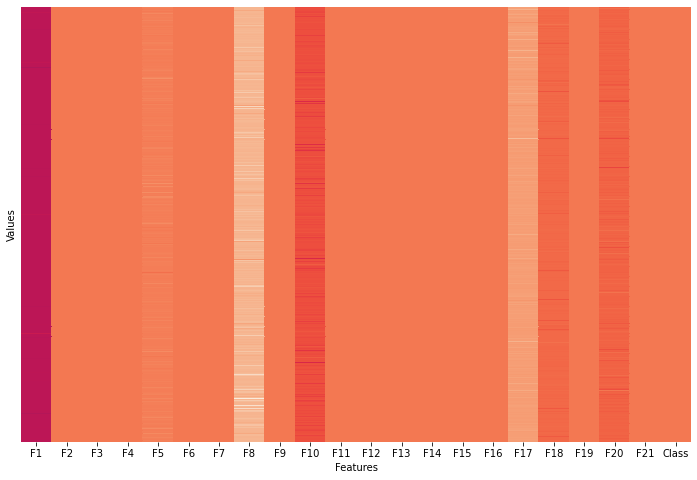

In [96]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df,cbar=False,yticklabels=False)
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

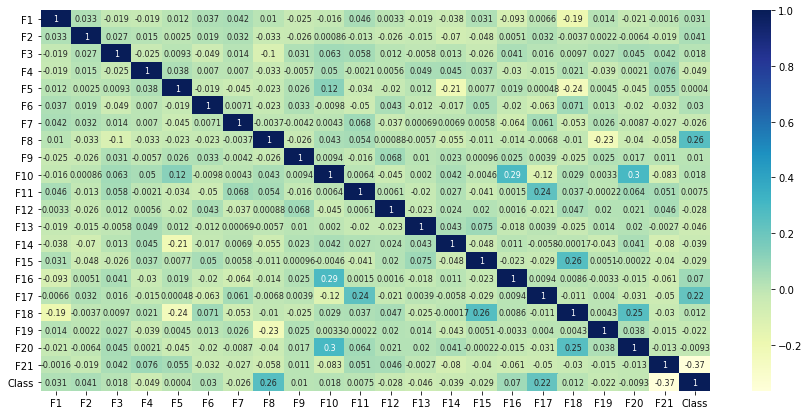

In [97]:
#To view the co-relation between the features and target
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':8},cmap='YlGnBu')
plt.show()

In [65]:
#Splitting the dataset
x =df.values[:, 0:20]
y= df.values[:, 21]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

# PART 2.1

# DECISION TREE

In [98]:
from sklearn.tree import DecisionTreeClassifier 
dtf=DecisionTreeClassifier(max_leaf_nodes=10 , random_state=0)
dtf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [99]:
dtf.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [100]:
#Understanding the probablity of target level being 1 0r 0
dtf.predict_proba(x_test)

array([[0.12313433, 0.87686567],
       [0.12313433, 0.87686567],
       [0.12313433, 0.87686567],
       [0.12244898, 0.87755102],
       [0.12313433, 0.87686567],
       [0.25714286, 0.74285714],
       [0.12313433, 0.87686567],
       [0.12313433, 0.87686567],
       [0.82795699, 0.17204301],
       [0.97350993, 0.02649007],
       [0.89285714, 0.10714286],
       [0.7972973 , 0.2027027 ],
       [0.7972973 , 0.2027027 ],
       [0.82795699, 0.17204301],
       [0.12313433, 0.87686567],
       [0.7972973 , 0.2027027 ],
       [0.12313433, 0.87686567],
       [0.25714286, 0.74285714],
       [0.12244898, 0.87755102],
       [1.        , 0.        ],
       [0.97350993, 0.02649007],
       [0.7972973 , 0.2027027 ],
       [0.89285714, 0.10714286],
       [0.12244898, 0.87755102],
       [0.15384615, 0.84615385],
       [0.97350993, 0.02649007],
       [1.        , 0.        ],
       [0.89285714, 0.10714286],
       [0.12313433, 0.87686567],
       [0.82795699, 0.17204301],
       [0.

# MODEL PERFORMANCE

In [101]:
print("Decision Tree Classifier Score:" ,dtf.score(x_test,y_test))
predictions=dtf.predict(x_test)
print("Precision Score:",precision_score(y_test,predictions))
print("Recall Score:",recall_score(y_test,predictions))

Decision Tree Classifier Score: 0.895
Precision Score: 0.8877551020408163
Recall Score: 0.8969072164948454


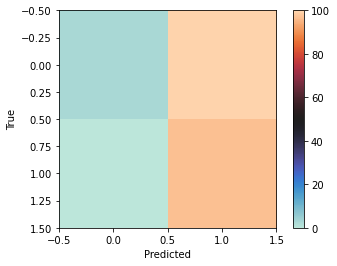

In [118]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test,predictions,labels=[0,1])
confmat=confusion_matrix(y_test,y_predicted,labels=[0,1])

plt.imshow(confmat, cmap='icefire')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       103
         1.0       0.89      0.90      0.89        97

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



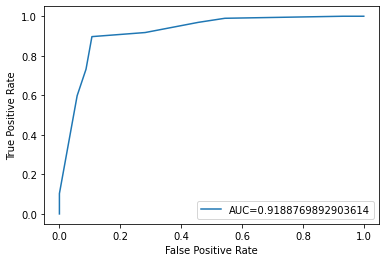

In [127]:
#ROC (receiver operating characteristic) curve is a plot of the true positive rate (TPR) against the false positive rate (FPR)
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_proba = dtf.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#Area Under the ROC Curve:between positive and negative classes. 
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

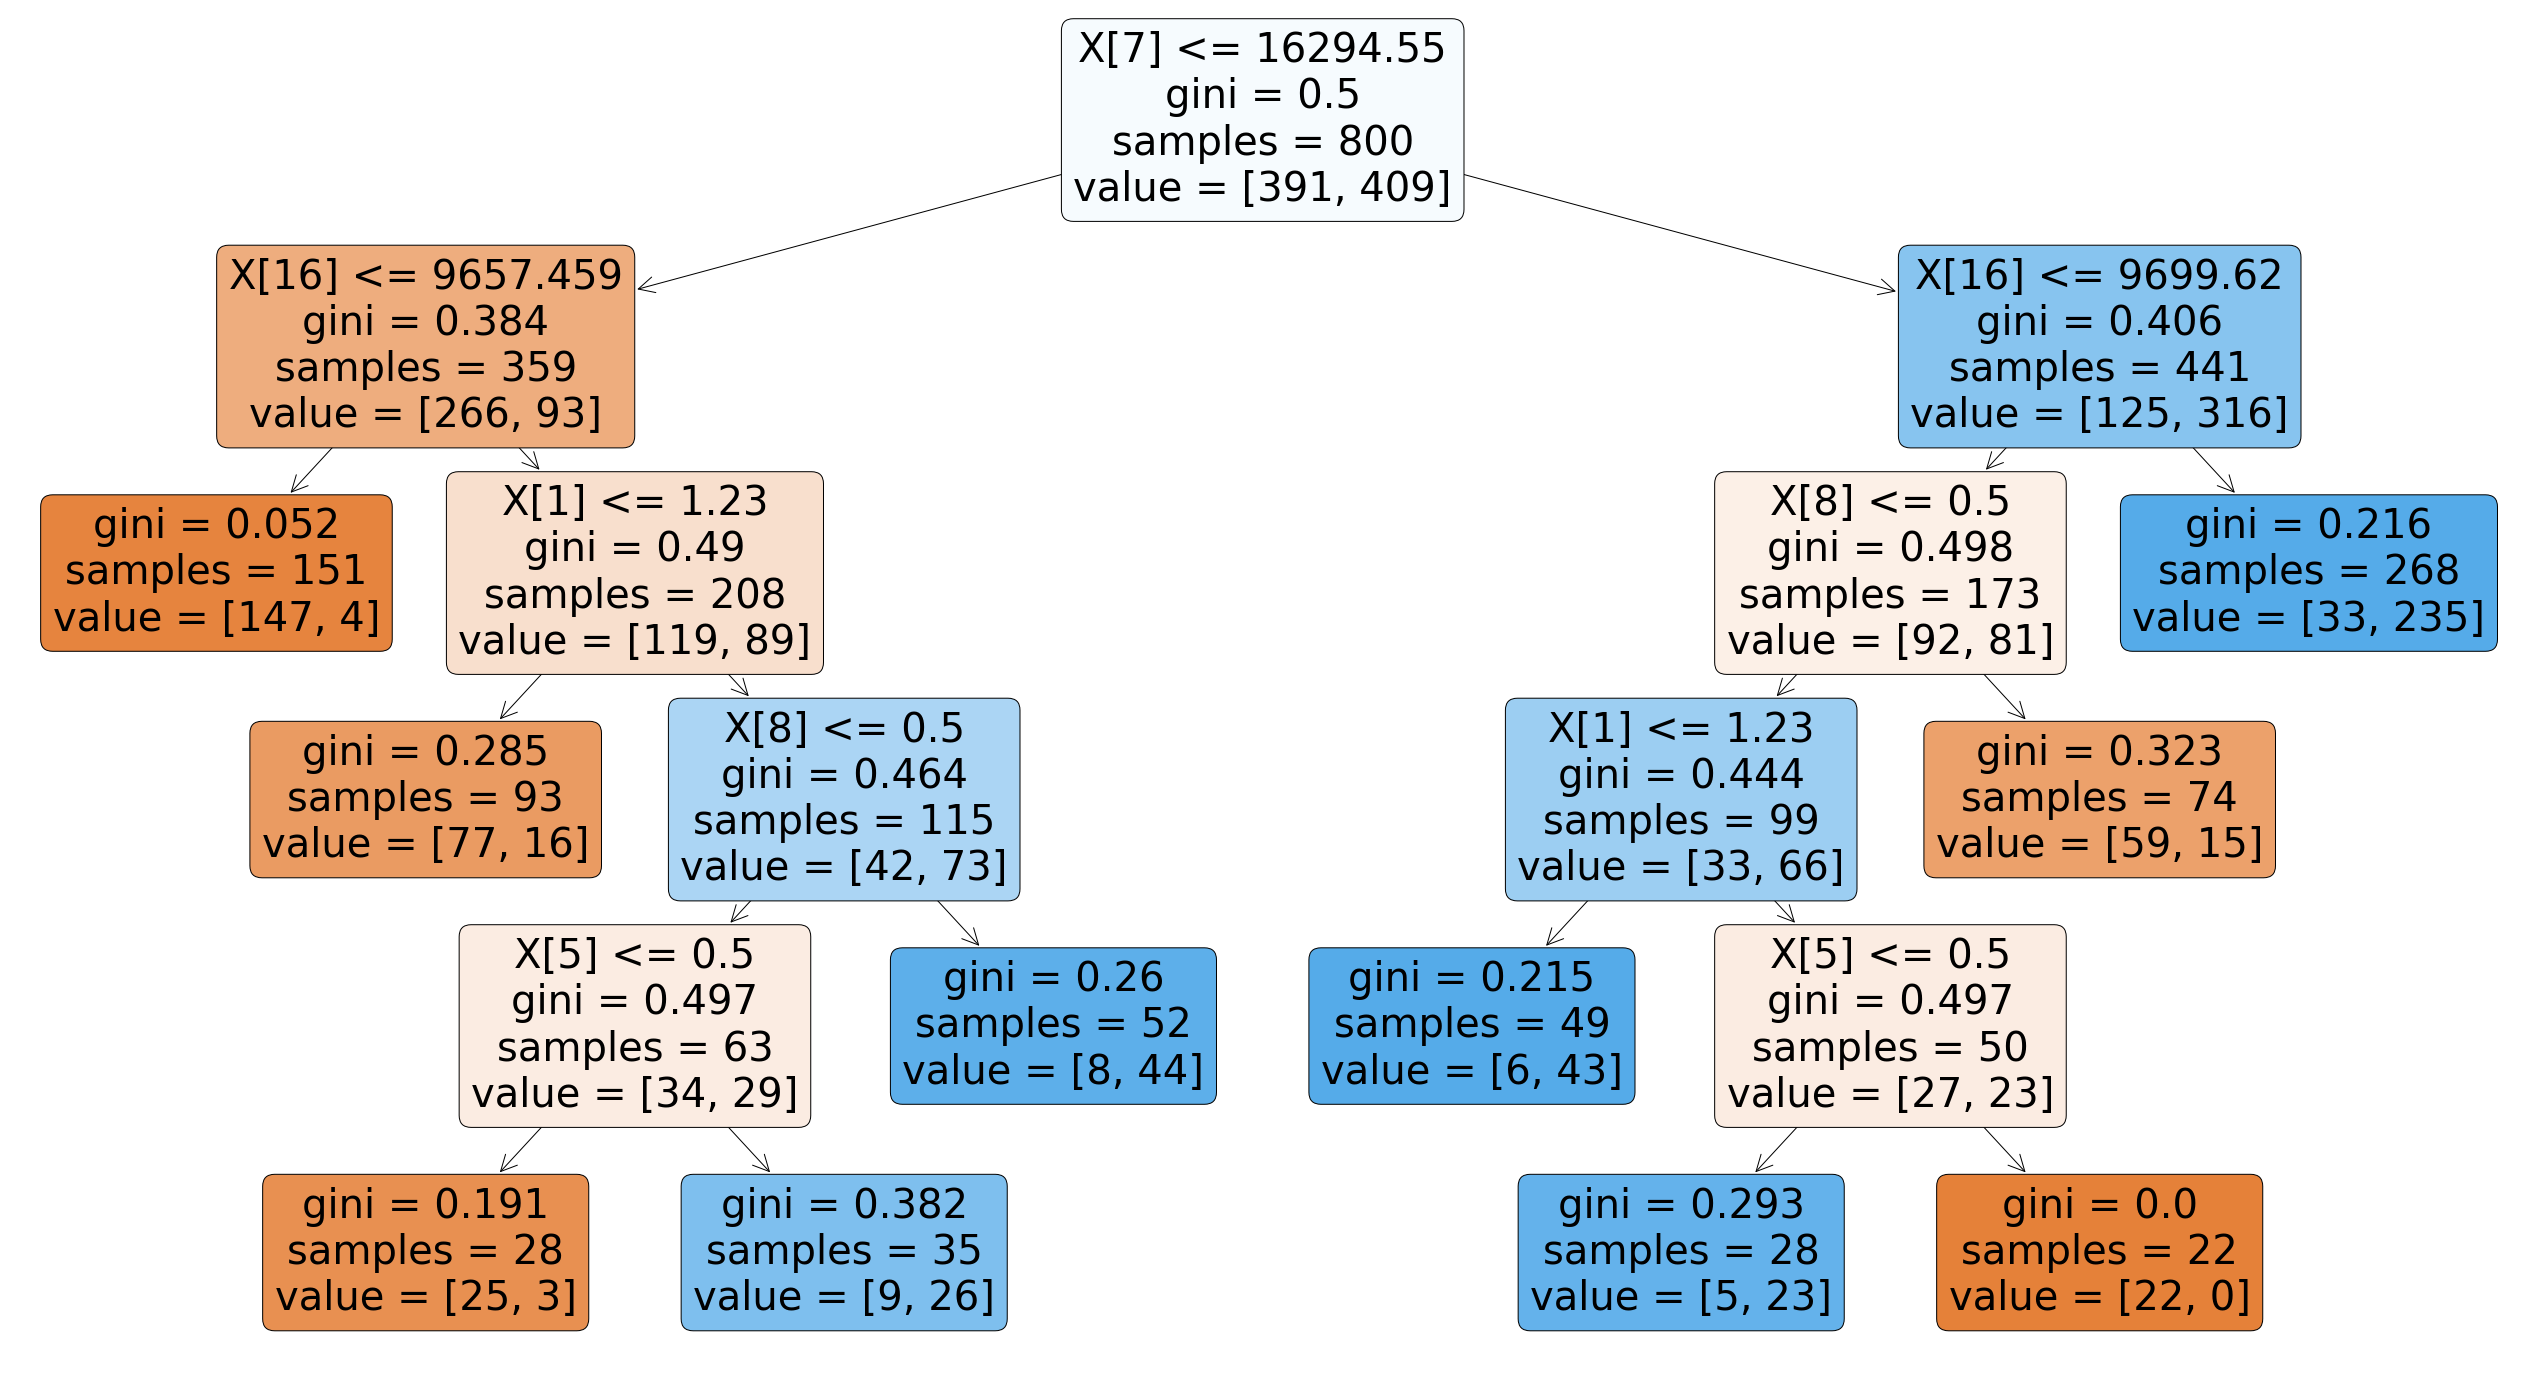

In [124]:
#Decision Tree Visualisation
from sklearn import tree
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(45,25))
tree.plot_tree(dtf,filled=True,rounded=True)
plt.show()


# PART 2B

# RANDOM FOREST

In [159]:
from sklearn.ensemble import RandomForestClassifier


# Model Tuning

In [176]:
#HYPERPARAMETERS
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth=[2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [177]:
rf_model=RandomForestClassifier()
#grid search Cv is used bevause small data set 0f1000
from sklearn.model_selection import GridSearchCV
rf_random = GridSearchCV(estimator = rf_model, param_grid = random_grid, cv = 5, verbose=2, n_jobs = 1)
# Fit the random search model


In [178]:
rf_random.fit(x_train,y_train)
rf_model.oob_score

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=288 
[CV]  bootstrap=True, max_depth=2, max_featu

[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=822, total=   1.0s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=822 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=822, total=   1.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=822 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=822, total=   1.0s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=822 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=822, total=   1.0s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=911 
[CV]  bootstrap=True, max_depth=2, max_featu

[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=555, total=   0.7s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=555 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=555, total=   0.7s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=555 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=555, total=   0.7s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=555 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=555, total=   0.7s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=644 
[CV]  bootstrap=True, max_depth=2, max_featu

[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=288, total=   0.4s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=288 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=288, total=   0.4s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=288 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=288, total=   0.4s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=288 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=288, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=377 
[CV]  bootstrap=True, max_depth=2, max_featu

[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=911, total=   1.2s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=911 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=911, total=   1.2s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=911 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=911, total=   1.4s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=911 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=911, total=   1.2s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=2, max_feat

[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=644, total=   0.8s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=644 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=644, total=   0.8s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=644 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=644, total=   0.8s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=644 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=644, total=   0.8s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=733 
[CV]  bootstrap=True, max_depth=2, max_featu

[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=377, total=   0.4s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=377 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=377, total=   0.5s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=377 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=377, total=   0.5s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=377 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=377, total=   0.5s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=466 
[CV]  bootstrap=True, max_depth=2, max_featu

[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.4s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.3s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.3s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.3s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, ma

[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=733, total=   1.0s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=733 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=733, total=   1.0s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=733 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=733, total=   1.0s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=733 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=733, total=   1.0s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=822 
[CV]  bootstrap=True, max_depth=2, max_featu

[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=466, total=   0.6s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=466 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=466, total=   0.6s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=466 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=466, total=   0.6s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=466 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=466, total=   0.5s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=555 
[CV]  bootstrap=True, max_depth=2, max_featu

[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=288 
[CV]  bootstrap=True, max_depth=2, max_featu

[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=822, total=   1.0s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=822 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=822, total=   1.0s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=822 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=822, total=   0.9s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=822 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=822, total=   1.0s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=911 
[CV]  bootstrap=True, max_depth=2, max_featu

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=555, total=   0.8s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=555 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=555, total=   0.8s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=555 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=555, total=   0.8s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=555 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=555, total=   0.8s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=644 
[CV]  bootstrap=True, max_depth=4, max_featu

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=288, total=   0.4s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=288 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=288, total=   0.4s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=288 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=288, total=   0.4s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=288 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=288, total=   0.4s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=377 
[CV]  bootstrap=True, max_depth=4, max_featu

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=911, total=   1.2s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=911 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=911, total=   1.3s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=911 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=911, total=   1.3s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=911 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=911, total=   1.3s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=4, max_feat

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=644, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=644 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=644, total=   1.0s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=644 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=644, total=   1.2s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=644 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=644, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=733 
[CV]  bootstrap=True, max_depth=4, max_featu

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=377, total=   0.5s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=377 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=377, total=   0.6s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=377 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=377, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=377 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=377, total=   0.8s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=466 
[CV]  bootstrap=True, max_depth=4, max_featu

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   1.7s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, ma

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=733, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=733 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=733, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=733 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=733, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=733 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=733, total=   1.1s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=822 
[CV]  bootstrap=True, max_depth=4, max_featu

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466, total=   0.7s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=555 
[CV]  bootstrap=True, max_depth=4, max_featu

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=288 
[CV]  bootstrap=True, max_depth=4, max_featu

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=822, total=   1.2s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=822 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=822, total=   1.2s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=822 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=822, total=   1.2s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=822 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=822, total=   1.4s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=911 
[CV]  bootstrap=True, max_depth=4, max_featu

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=555, total=   0.9s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=555 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=555, total=   0.8s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=555 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=555, total=   0.8s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=555 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=555, total=   0.8s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=644 
[CV]  bootstrap=True, max_depth=4, max_featu

[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=288, total=   0.4s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=288 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=288, total=   0.3s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=288 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=288, total=   0.3s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=288 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=288, total=   0.3s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=377 
[CV]  bootstrap=False, max_depth=2, 

[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=911, total=   1.0s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=911 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=911, total=   1.1s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=911 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=911, total=   1.0s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=911 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=911, total=   1.1s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=911 
[CV]  bootstrap=False, max_depth=2, 

[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=555, total=   0.6s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=644 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=644, total=   0.8s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=644 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=644, total=   0.8s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=644 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=644, total=   0.7s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=644 
[CV]  bootstrap=False, max_depth=2, 

[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=288, total=   0.3s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=288 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=288, total=   0.3s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=377 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=377, total=   0.4s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=377 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=377, total=   0.4s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=377 
[CV]  bootstrap=False, max_depth=2, 

[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=911, total=   1.0s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=911 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=911, total=   1.0s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=911 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=911, total=   1.0s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.1s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=

[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=644, total=   0.7s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=644 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=644, total=   0.7s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=644 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=644, total=   0.7s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=644 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=644, total=   0.7s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=733 
[CV]  bootstrap=False, max_depth=2, 

[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=377, total=   0.4s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=377 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=377, total=   0.4s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=377 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=377, total=   0.4s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=377 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=377, total=   0.4s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=377 
[CV]  bootstrap=False, max_depth=2, 

[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=911, total=   1.1s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.2s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.2s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.1s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_de

[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=644, total=   0.7s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=644 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=644, total=   0.7s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=733 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=733, total=   0.9s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=733 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=733, total=   1.0s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=733 
[CV]  bootstrap=False, max_depth=2, 

[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=377, total=   0.5s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=377 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=377, total=   0.5s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=377 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=377, total=   0.5s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=466 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=466, total=   0.5s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=466 
[CV]  bootstrap=False, max_depth=2, 

[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.1s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.2s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.2s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.2s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_de

[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=733, total=   0.9s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=733 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=733, total=   0.8s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=733 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=733, total=   0.8s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=733 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=733, total=   0.8s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=733 
[CV]  bootstrap=False, max_depth=2, 

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=377, total=   0.6s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=466 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=466, total=   0.7s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=466 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=466, total=   0.7s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=466 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=466, total=   0.7s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=466 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.4s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.5s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=733, total=   1.0s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=733 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=733, total=   1.0s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=733 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=733, total=   1.0s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=822 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=822, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=822 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=466, total=   0.7s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=466 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=466, total=   0.7s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=466 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=466, total=   0.7s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=466 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=466, total=   0.7s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=555 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=733, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=822 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=822, total=   1.3s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=822 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=822, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=822 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=822, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=822 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=466, total=   0.7s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=466 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=466, total=   0.6s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=555 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=555, total=   0.8s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=555 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=555, total=   0.8s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=555 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=288 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=288, total=   0.4s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=288 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=822, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=822 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=822, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=822 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=822, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=822 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=822, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=911 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=555, total=   0.8s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=555 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=555, total=   0.8s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=555 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=555, total=   0.8s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=555 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=555, total=   0.8s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=555 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.3s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=288 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=288, total=   0.4s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=288 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=288, total=   0.4s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=288 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=288, total=   0.4s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=288 
[CV]  bootstrap=False, max_depth=4, 

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=822, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=822 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=822, total=   1.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=911 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=911, total=   1.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=911 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=911, total=   1.5s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=911 
[CV]  bootstrap=False, max_depth=4, 

[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed: 24.8min finished


False

In [ ]:
# Best tuning Hyperparameters
rf_random.best_params_

# Model Performance

In [180]:
#Evaluation
print("Random Forest Classifier Score:" ,rf_random.score(x_test,y_test))
y_predicted=rf_random.predict(x_test)
print("Precision Score:",precision_score(y_test,y_predicted))
print("Recall Score:",recall_score(y_test,y_predicted))

Random Forest Classifier Score: 0.825
Precision Score: 0.8369565217391305
Recall Score: 0.7938144329896907


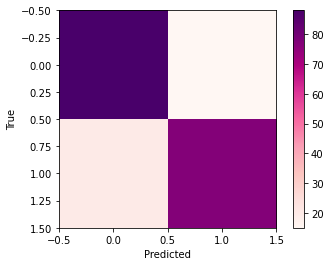

In [192]:
from sklearn.metrics import confusion_matrix
confmat=confusion_matrix(y_test,y_predicted,labels=[0,1])

plt.imshow(confmat, cmap='RdPu')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [193]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       103
         1.0       0.89      0.90      0.89        97

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



# SVM:Support Vector Machine

# Model Tuning

In [29]:
#Hyperparameter Optimization
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  


In [30]:
#Training the Algorithm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm_model=SVC(gamma='auto')

In [31]:
#Cross validation
grid = GridSearchCV(estimator=svm_model,param_grid=param_grid, refit = True, verbose = 3)

In [32]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(gamma='auto'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [33]:
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

# Model Performance

In [39]:
print("Support Vector Machine  Score:" ,grid.score(x_test,y_test))
y_predicted=grid.predict(x_test)
print("Precision Score:",precision_score(y_test,y_predicted))
print("Recall Score:",recall_score(y_test,y_predicted))

SVM  Score: 0.5
Precision Score: 0.49238578680203043
Recall Score: 1.0


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.03      0.06       103
         1.0       0.49      1.00      0.66        97

    accuracy                           0.50       200
   macro avg       0.75      0.51      0.36       200
weighted avg       0.75      0.50      0.35       200



# PART B

In [ ]:
#Decision Tree has been predicted with best performance and was implemented

In [41]:
# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

X_test=test_df.iloc[:,:-1]

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()
test_df.drop(columns=['Class'])

X_test = mean_imputer.fit_transform(X_test.iloc[:,:-1])


In [42]:
pred=dtf.predict(X_test)

In [43]:
test_df.iloc[:,-1]=pred

In [44]:
test_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-27811.790,0.73,-4.043706,-4.6095,2063.450,0,4.0293,16628.180,0,-9497.42,...,-5.2930,5.22260,17.5350,3.0828,9640.918,-3691.77,3.0300,-5758.42,-11.57,1.0
1,-28721.370,0.73,-7.532000,-5.6700,992.050,1,4.4711,15953.180,1,-12595.82,...,-3.8826,4.23164,17.8560,2.0421,9764.120,-3574.65,5.2620,-5753.22,-10.29,0.0
2,-28706.015,0.73,-6.698000,-7.3560,2115.550,1,3.8388,16308.040,1,-9969.02,...,-13.8500,4.75960,16.6260,3.9639,9572.620,-3776.73,2.6883,-5453.02,NaN,0.0
3,-28671.690,0.73,-4.100420,-10.9410,1582.684,1,3.8790,17506.780,1,-10968.62,...,-14.8500,6.20000,13.7511,2.2122,9608.240,-4217.55,1.5393,-5244.50,-9.29,0.0
4,-28720.720,1.73,-4.506200,-6.2670,1949.250,0,5.0470,16155.058,0,-5815.82,...,-17.9400,5.38760,14.4630,1.5048,9622.040,-3560.13,1.4982,-4460.22,-8.97,0.0


In [45]:
# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

In [47]:

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])